<h1 style="color:rgb(0,120,170)"> $k$-nearest neighbors</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Visualization</h2>

Visualize the data stored in `DataSet1.csv` with two different colors. Always label the axes of all your plots.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

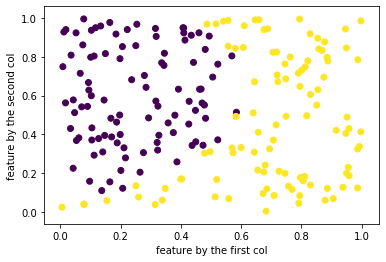

In [2]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

# your code here:

plt.scatter(Z[:,0],Z[:,1],c=y)
plt.xlabel("feature by the first col")
plt.ylabel("feature by the second col")
plt.show()

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

- Is the $k$-nearest neighbors algorithm a reasonable approach for this data?


Tick the correct box:

\[  \]  No, because the data are cleanly separated <br>
\[  \]  No, because the data are not cleanly separated <br>
\[ V \]  Yes, because the data are cleanly separated <br>
\[  \]  Yes, because the data are not cleanly separated

<h2 style="color:rgb(0,120,170)">Task 2: Training the model</h2>

Use $k$-nearest neighbors classifiers with $k \in \{1,3,5,...,177,179\}$. Either use the `kNeigbhors` function from
`sklearn` or implement it on your own. In order to estimate the generalization error, use 10-fold
cross validation. Visualize your results, i.e., plot mean error rate vs. $k$.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

In [3]:
#method for kNN method
from sklearn.model_selection import KFold
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# your code here:


neighbors = list(range(1, 181, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

    

The optimal number of neighbors is 1


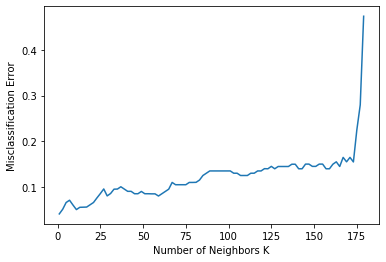

In [4]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

* Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ gives complex models? Why?

Tick the correct box:

\[  \]  Model complexity increases with increasing $k$, as larger $k$ means that features are more distinct <br>
\[  \]  Model complexity increases with increasing $k$, as larger $k$ means that features are less distinct <br>
\[  V\]  Model complexity increases with decreasing $k$, as smaller $k$ means that features are more distinct <br>
\[  \]  Model complexity increases with decreasing $k$, as smaller $k$ means that features are less distinct <br>

* For the data above, how does the error develop with the model complexity? Why?

Tick the correct box:

\[  \]  The error increases with increasing $k$, as there is hardly any noise in the data <br>
\[ V\]  The error increases with increasing $k$, as there is a lot of any noise in the data <br>
\[  \]  The error increases with decreasing $k$, as there is hardly any noise in the data <br>
\[  \]  The error increases with decreasing $k$, as there is a lot of any noise in the data <br>

<h2 style="color:rgb(0,120,170)">Task 3: Add noise to labels</h2>

Flip the sign of the labels of the data randomly with probability of $\frac{1}{5}$. Use the random seed given below. Perform the same steps as before, i.e. plot the data and plot the mean error rate vs. $k$ for 10-fold cross validation.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

In [5]:
#flip labels of data
np.random.seed(1234)

# your code here:
import random

n = len(y)
percent = 0.2

partly_flipped = [ -1*y[i] if i in random.sample(list(range(n)),int(percent*n)) else y[i] for i in range(n) ]

y_1=partly_flipped

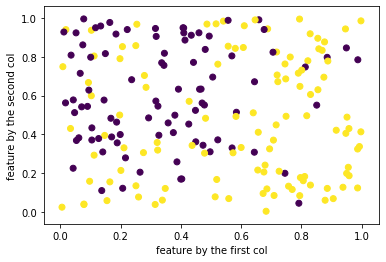

In [6]:
plt.scatter(Z[:,0],Z[:,1],c=y_1)
plt.xlabel("feature by the first col")
plt.ylabel("feature by the second col")
plt.show()

The optimal number of neighbors is 17


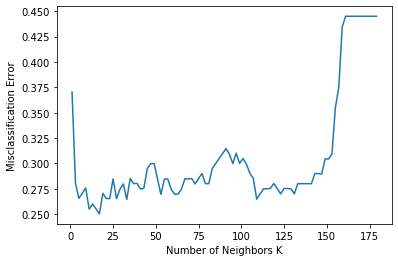

In [7]:
neighbors = list(range(1, 181, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

<h3 style="color:rgb(210,90,80)">Question (10 points)</h3>

* Which differences do you observe?
* Which conclusions do you draw from that?

Tick the correct boxes:

\[  \]  Clear separation of the data remains <br>
\[  V\]  Clear separation of the data vanishes <br>

\[  V\]  Random label flipping brings noise into data <br>
\[  \]  Random label flipping simply swaps data, no significant change <br>

\[  \]  Very small values of $k$ correspond to too low model complexity (underfitting) <br>
\[  \]  Very small values of $k$ correspond to too low model complexity (overfitting) <br>
\[  \]  Very small values of $k$ correspond to too large model complexity (underfitting) <br>
\[  V\]  Very small values of $k$ correspond to too large model complexity (overfitting) <br>

\[  V\]  Very large values of $k$ correspond to too low model complexity (underfitting) <br>
\[  \]  Very large values of $k$ correspond to too low model complexity (overfitting) <br>
\[  \]  Very large values of $k$ correspond to too large model complexity (underfitting) <br>
\[  \]  Very large values of $k$ correspond to too large model complexity (overfitting) <br>

\[  \]  Overall, the error remains nearly unchanged compared to the original data set. <br>
\[  V\]  Overall, the error increases compared to the original data set. <br>

<h2 style="color:rgb(0,120,170)">Task 4: $k$-NN in higher dimensions</h2>

Going back to unflipped labels, add $f$ = 1,2,3,4 random features to the data matrix $X$ which are uniformly distributed between 0 an 1. Again, plot the mean error versus $k$ for 10 folds. Plot mean error versus $f$ for $k$ = 11.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [8]:
#create a data frame with 1,2,3,4 additional columns
np.random.seed(1234)

# your code here:

In [9]:
# to know how many rows we have in the given data set of X 
X.shape[0]

200

In [64]:
def create_col_uni(n):
    
    col = []
    for i in range(n):
        f_sel = np.random.uniform(size=200)
        col.append(f_sel)
    return col
            
    

def append_mat(n):
    
    cols = create_col_uni(n)
    a= np.hstack((X, np.atleast_2d(cols).T))
    return a


def plot_error_graph(n):
    
    cv_scores_1 = []
    final_matrix = append_mat(n)
    
    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores_1 = cross_val_score(knn,final_matrix, y, cv=10, scoring='accuracy')
        cv_scores_1.append(scores_1.mean())
    
    # changing to misclassification error
    mse_1 = [1 - x for x in cv_scores_1]

    # determining best k
    optimal_k_1 = neighbors[mse_1.index(min(mse_1))]
    
    plt.plot(neighbors, mse_1)
    message = f"mean squared error vs. K numbers with f={n}"
    plt.title(message)
    plt.xlabel("Number of Neighbors K")
    plt.ylabel("Misclassification Error")
    
    return plt.show(), print("The optimal number of neighbors is {}".format(optimal_k_1)) 



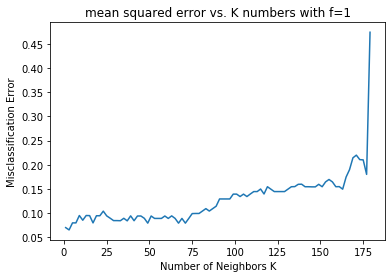

The optimal number of neighbors is 3


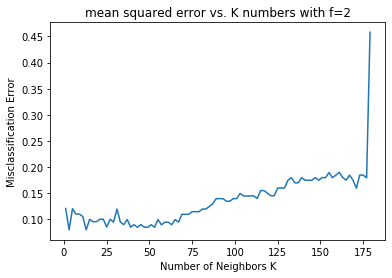

The optimal number of neighbors is 13


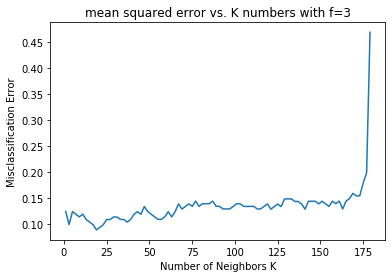

The optimal number of neighbors is 19


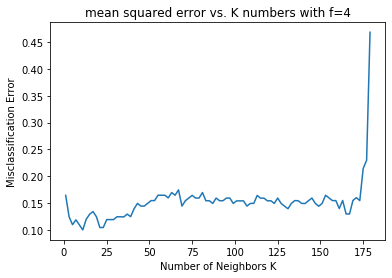

The optimal number of neighbors is 11


(None, None)

In [65]:
# plot mean error vs k with f=1 
plot_error_graph(1)

# plot mean error vs k with f=2 
plot_error_graph(2)

# plot mean error vs k with f=3 
plot_error_graph(3)

# plot mean error vs k with f=4 
plot_error_graph(4)

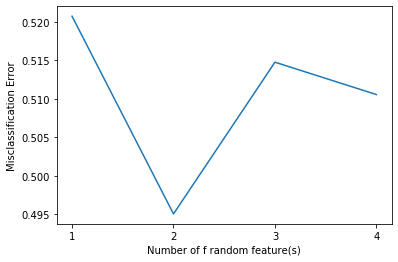

In [83]:
f_4 = append_mat(4)
f_num= [1,2,3,4]
f_only = f_4[:,[2,3,4,5]]

f_list = (f_only[:,[0]], f_only[:,[0,1]], f_only[:,[0,1,2]], f_only[:,[0,1,2,3]])

cv_scores_2 = []


for i in range(len(f_num)):
    
    knn = KNeighborsClassifier(n_neighbors=11)
    scores_2 = cross_val_score(knn,f_list[i] , y, cv=10, scoring='accuracy')
    cv_scores_2.append(scores_2.mean())

        
# changing to misclassification error
mse_2 = [1 - x for x in cv_scores_2]

# plot misclassification error vs k
plt.plot(f_num, mse_2)
plt.xticks(np.arange(min(f_num), max(f_num)+1, 1))
plt.xlabel("Number of f random feature(s)")
plt.ylabel("Misclassification Error")
plt.show()

<h3 style="color:rgb(210,90,80)">Question (5 points)</h3>

* Try to explain possible changes of the generalization error.

Tick the correct boxex:

\[  \]  $k$-nearest neighbors is robust aginst randomly added further features; noise is filtered out <br>
\[  V\]  $k$-nearest neighbors is not robust aginst randomly added further features; noise is not filtered out

\[  V\]  The more noise (extra dimensions), the lower the optimal $k$ <br>
\[  \]  The more noise (extra dimensions), the higher the optimal $k$ <br>